<a href="https://colab.research.google.com/github/JonathanPuertaG/Challenge2-TelecomX/blob/main/Challenge_Telecom_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##📌 Extracción

In [ ]:
import requests
import pandas as pd

url = "https://raw.githubusercontent.com/sthemonica/alura-voz/refs/heads/main/Dados/Telco-Customer-Churn.json"

response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


> El dataset contiene algunas columnas con estructura anidada (diccionarios) que deben ser transformadas antes del análisis.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


##🔧 Transformación


Las columnas `customer`, `phone`, `internet` y `account` contienen diccionarios. Para convertirlas en columnas individuales, usé `pandas.json_normalize()`:


In [ ]:
# Normalizar columnas anidadas
df_plano  = pd.json_normalize(df['customer'])
phone_data = pd.json_normalize(df['phone'])
internet_data = pd.json_normalize(df['internet'])
account_data = pd.json_normalize(df['account'])

# Concatenar columnas planas
df_final = pd.concat(
    [df[['customerID', 'Churn']],
     df_plano ,
     phone_data,
     internet_data,
     account_data],
    axis=1
)

df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


> Ahora contamos con un DataFrame plano, donde cada columna representa una variable única, lo que facilita el análisis exploratorio.


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
#No se evidencian valores nulos, sin embargo es necesario validar valores vacíos (espacios o cadenas vacías)
df_final['Churn'].value_counts(dropna=False)


,count
Churn,
No,5174
Yes,1869
,224


In [ ]:
## Como se identificaron valores vacios en la columna churn es necesario validarlo para las demas columnas
for col in df_final.columns:
    print(f"\n🔍 Columna: {col}")
    print(df_final[col].value_counts(dropna=False))



🔍 Columna: customerID
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

🔍 Columna: Churn
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

🔍 Columna: gender
gender
Male      3675
Female    3592
Name: count, dtype: int64

🔍 Columna: SeniorCitizen
SeniorCitizen
0    6085
1    1182
Name: count, dtype: int64

🔍 Columna: Partner
Partner
No     3749
Yes    3518
Name: count, dtype: int64

🔍 Columna: Dependents
Dependents
No     5086
Yes    2181
Name: count, dtype: int64

🔍 Columna: tenure
tenure
1     634
72    369
2     246
3     207
4     185
     ... 
28     60
39     59
44     54
36     50
0      11
Name: count, Length: 73, dtype: int64

🔍 Columna: PhoneService
PhoneService
Yes    6560
No      707
Name: count, dtype: int64

🔍 Columna: MultipleLines
MultipleLines
No                  3495
Yes    

In [ ]:
# 1.Corregir tipo de dato en 'Charges.Total'
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')
print(df_final['Charges.Total'].dtype)

float64


In [ ]:
#2. Reemplazar valores vacíos o solo espacios por NaN
df_final.replace(r'^\s*$', pd.NA, regex=True, inplace=True)


In [ ]:
# 3. Verificar y mostrar valores nulos por columna
print("Valores nulos por columna:")
print(df_final.isna().sum())

Valores nulos por columna:
customerID            0
Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Monthly       0
Charges.Total        11
dtype: int64


In [ ]:
# 4. Eliminar registros con 'Churn' nulo
df_final = df_final.dropna(subset=['Churn'])

In [ ]:
# 5. Eliminar registros donde 'Charges.Total' quedó como NaN tras la conversión
df_final = df_final.dropna(subset=['Charges.Total'])

In [ ]:
# 6. Conversión del tipo 'Charges.Total' (ya se hizo), aseguramos el tipo
df_final['Charges.Total'] = df_final['Charges.Total'].astype(float)

/tmp/ipython-input-12-2203340147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Charges.Total'] = df_final['Charges.Total'].astype(float)


In [ ]:
# 7. Revision de duplicados
print(df_final.duplicated().sum())

0


In [ ]:
# 8. Resetear el índice después de eliminar filas
df_final.reset_index(drop=True, inplace=True)

In [ ]:
# 9. Vista general del DataFrame limpio
print("\nVista general del DataFrame limpio:")
print(df_final.info())
print(df_final.head())


Vista general del DataFrame limpio:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contr

In [ ]:
# Creamos la columna "Cuentas_Diarias"
df_final['Cuentas_Diarias'] = df_final['Charges.Monthly'] / 30

# Verificamos las primeras filas
df_final[['Charges.Monthly', 'Cuentas_Diarias']].head()


/tmp/ipython-input-16-3337739536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Cuentas_Diarias'] = df_final['Charges.Monthly'] / 30


,Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [ ]:
df_final[['customerID', 'Charges.Monthly', 'Cuentas_Diarias']].sample(5)


,customerID,Charges.Monthly,Cuentas_Diarias
4135,5858-EAFCZ,44.45,1.481667
1141,1682-VCOIO,20.45,0.681667
959,1394-SUIUH,85.15,2.838333
5809,8191-XWSZG,20.65,0.688333
5507,7771-ZONAT,56.75,1.891667


##📊 Carga y análisis

### 🔢 Resumen estadístico general

In [ ]:
df_final.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159940
std,0.368844,24.545260,30.085974,2266.771362,1.002866
min,0.000000,1.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.587500,401.450000,1.186250
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.862500,3794.737500,2.995417
max,1.000000,72.000000,118.750000,8684.800000,3.958333


### 🧮 Distribución de variables categóricas

In [ ]:
df_final['Churn'].value_counts(normalize=True) * 100

,proportion
Churn,
No,73.421502
Yes,26.578498


In [ ]:
df_final['Contract'].value_counts(normalize=True) * 100

,proportion
Contract,
Month-to-month,55.105233
Two year,23.961889
One year,20.932878


In [ ]:
df_final['InternetService'].value_counts(normalize=True) * 100

,proportion
InternetService,
Fiber optic,44.027304
DSL,34.357224
No,21.615472


In [ ]:
df_final['gender'].value_counts(normalize=True) * 100

,proportion
gender,
Male,50.469283
Female,49.530717


### 📈 Visualizaciones para el Análisis Descriptivo

In [ ]:
# crear rangos para tenure
df_final['rango_tenure'] = pd.cut(df_final['tenure'],
                                 bins=[0, 6, 12, 24, 36, 48, 60, 72],
                                 labels=['0-6', '7-12', '13-24', '25-36', '37-48', '49-60', '61-72'],
                                 right=True)

In [ ]:
def graficar_abandono(columna_grupo, titulo, xlabel, nombre_archivo=None):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd

    # Calcular conteo por grupo y Churn
    tabla = df_final.groupby([columna_grupo, 'Churn'], observed=False).size().reset_index(name='count')

    # Pivotear para que cada grupo tenga columnas separadas 'Yes' y 'No'
    tabla_pivot = tabla.pivot(index=columna_grupo, columns='Churn', values='count').fillna(0)

    # Asegurar columnas 'Yes' y 'No' estén presentes
    if 'Yes' not in tabla_pivot.columns:
        tabla_pivot['Yes'] = 0
    if 'No' not in tabla_pivot.columns:
        tabla_pivot['No'] = 0

    # Calcular total y porcentaje por grupo
    tabla_pivot['Total'] = tabla_pivot['Yes'] + tabla_pivot['No']
    tabla_pivot['ChurnPercent'] = (tabla_pivot['Yes'] / tabla_pivot['Total'] * 100).round(1)

    # Gráfico
    fig, ax = plt.subplots(figsize=(10, 6))
    tabla_pivot[['No', 'Yes']].plot(kind='bar', stacked=False, ax=ax, color=['#8dd3c7', '#fb8072'])

    ax.set_title(titulo)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Número de Clientes")
    ax.legend(title='Churn')
    plt.xticks(rotation=45)

    # Añadir número de clientes sobre cada barra
    for i, grupo in enumerate(tabla_pivot.index):
        no_val = tabla_pivot.loc[grupo, 'No']
        yes_val = tabla_pivot.loc[grupo, 'Yes']

        # Posiciones relativas
        x_base = i

        ax.text(x_base - 0.15, no_val + 10, int(no_val), ha='center', fontsize=9)
        ax.text(x_base + 0.15, yes_val + 10, int(yes_val), ha='center', fontsize=9)

        # Porcentaje de abandono (Yes)
        ax.text(x_base + 0.15, yes_val + 90,
                f"{tabla_pivot.loc[grupo, 'ChurnPercent']}%",
                ha='center', fontsize=10, color='red', fontweight='bold')

    plt.tight_layout()

    # 🔽 Guardar imagen si se pasa el nombre del archivo
    if nombre_archivo:
        plt.savefig(nombre_archivo)

    plt.show()


#### **Relación entre abandono y género**

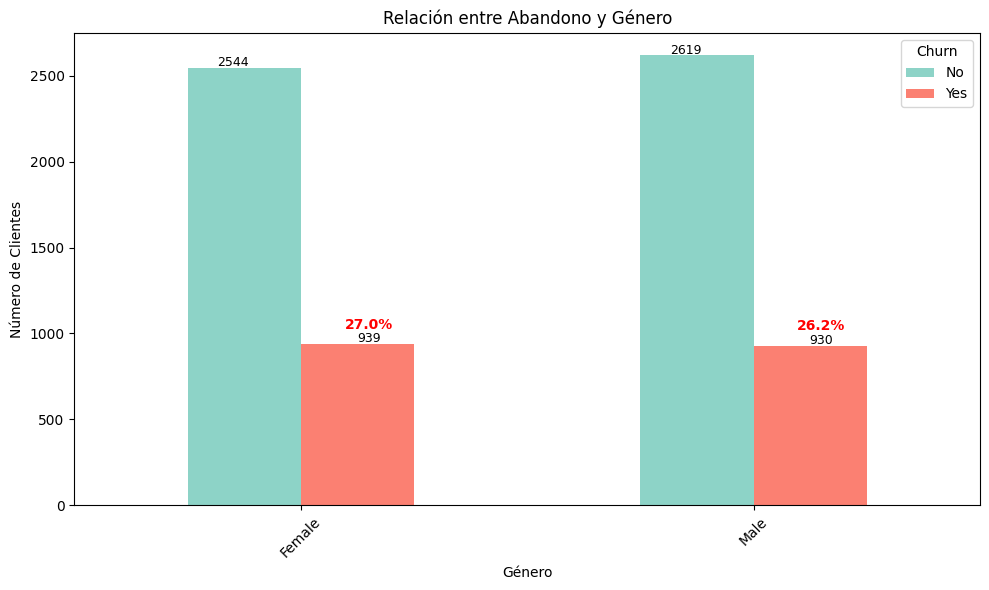

In [ ]:
graficar_abandono('gender', 'Relación entre Abandono y Género', 'Género','abandono_genero.png')

#### **Relación entre abandono y tipo de contrato**


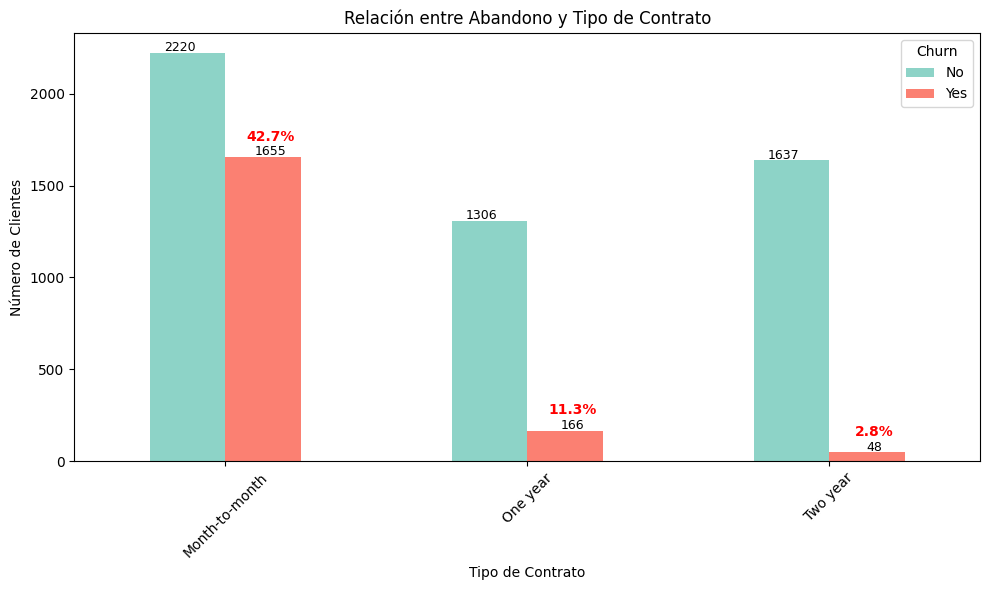

In [ ]:
graficar_abandono('Contract', 'Relación entre Abandono y Tipo de Contrato', 'Tipo de Contrato','abandono_contrato.png')

#### **Relacion entre abandono y tipo de servicio**


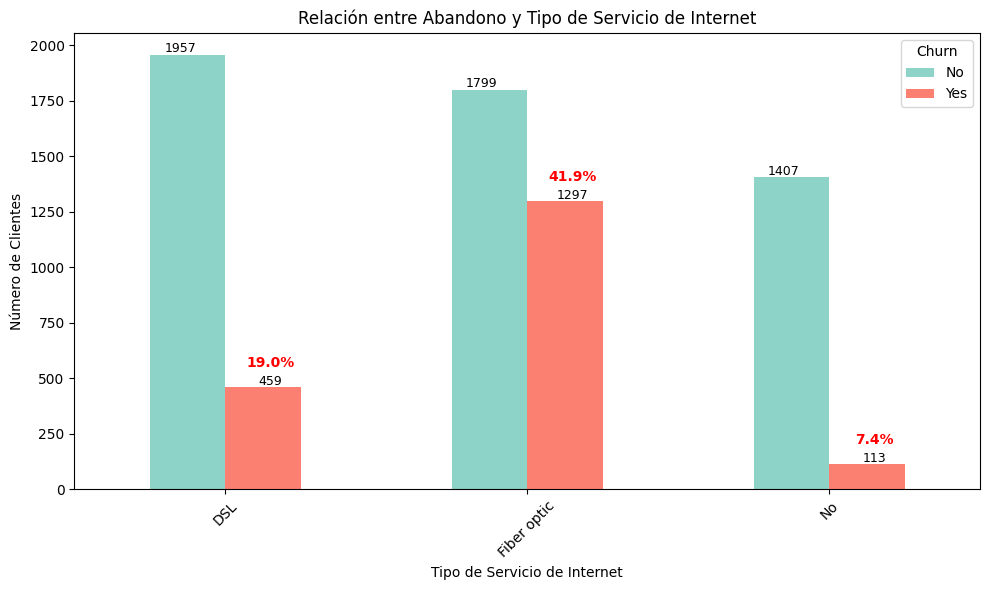

In [ ]:
graficar_abandono('InternetService', 'Relación entre Abandono y Tipo de Servicio de Internet', 'Tipo de Servicio de Internet','abandono_tipo_servicio.png')


#### **Relacion entre abandono y adulto mayor**

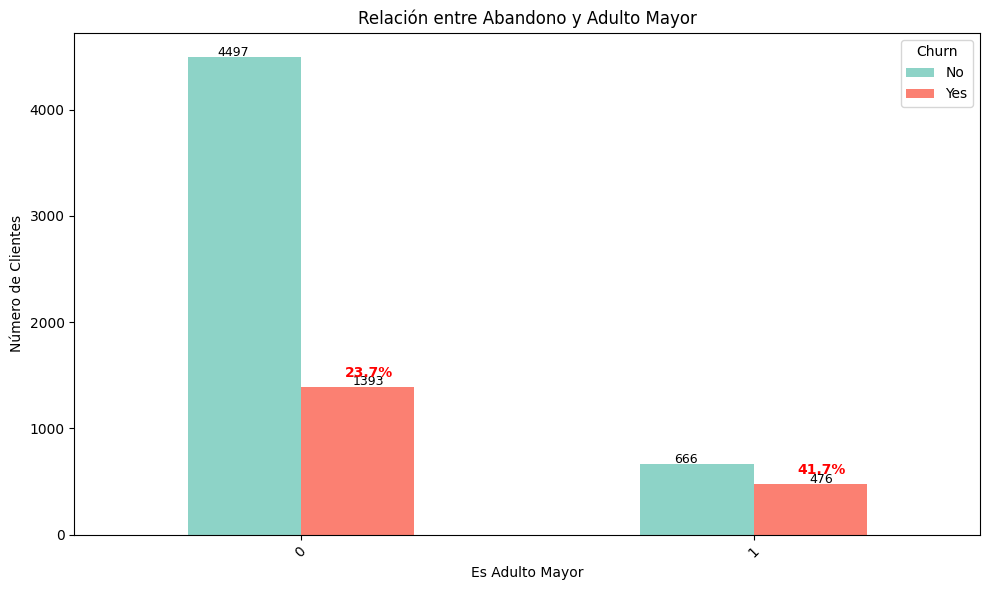

In [ ]:
graficar_abandono('SeniorCitizen', 'Relación entre Abandono y Adulto Mayor', 'Es Adulto Mayor','abandono_adulto_mayor.png')

#### **Relación entre abandono y método de pago**

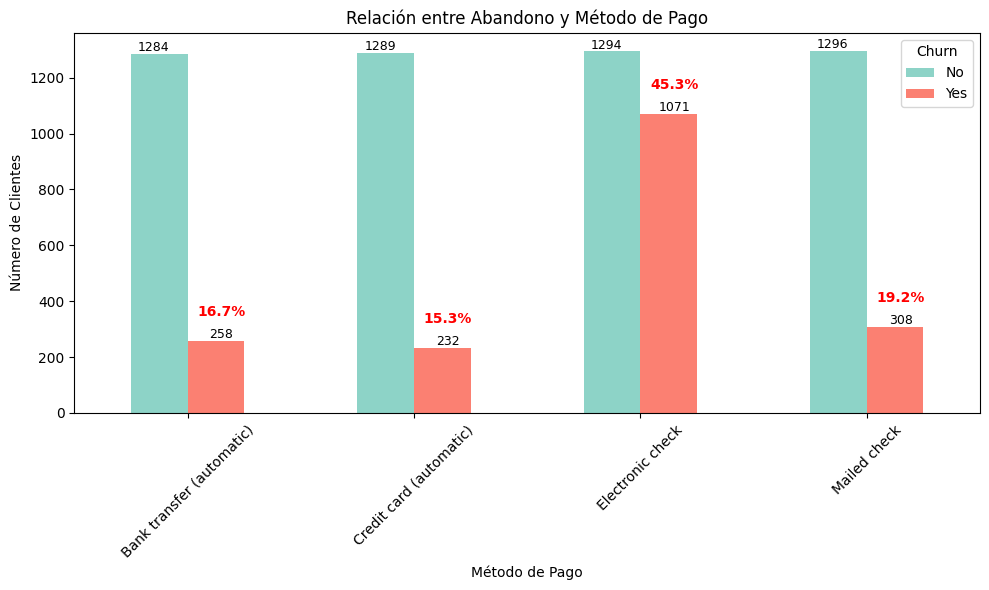

In [73]:

graficar_abandono('PaymentMethod', 'Relación entre Abandono y Método de Pago', 'Método de Pago','abandono_metodo_pago.png')


####**Relación entre abandono y antiguedad**


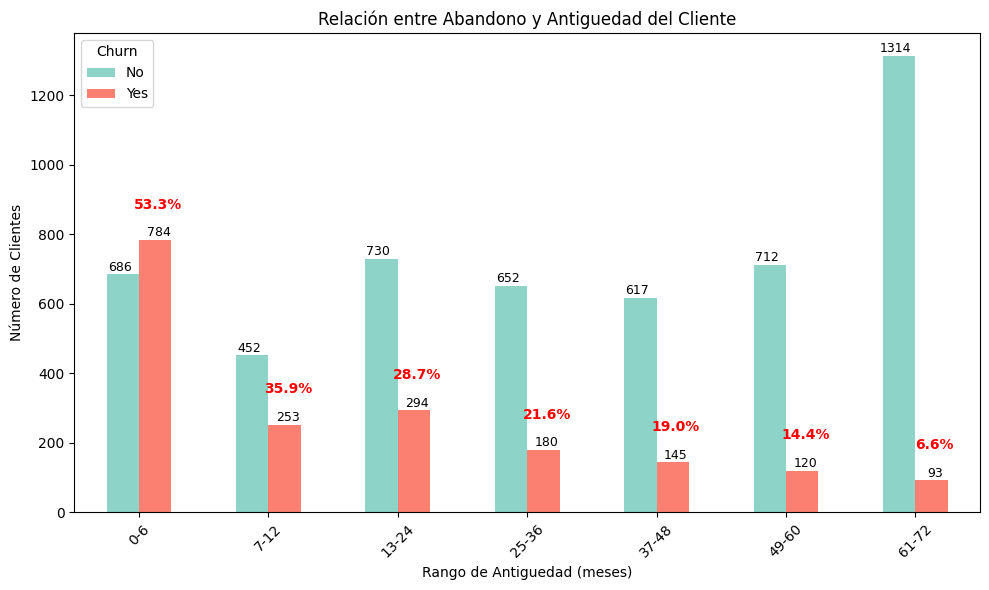

In [75]:
graficar_abandono('rango_tenure', 'Relación entre Abandono y Antiguedad del Cliente', 'Rango de Antiguedad (meses)','abandono_antiguedad.png')

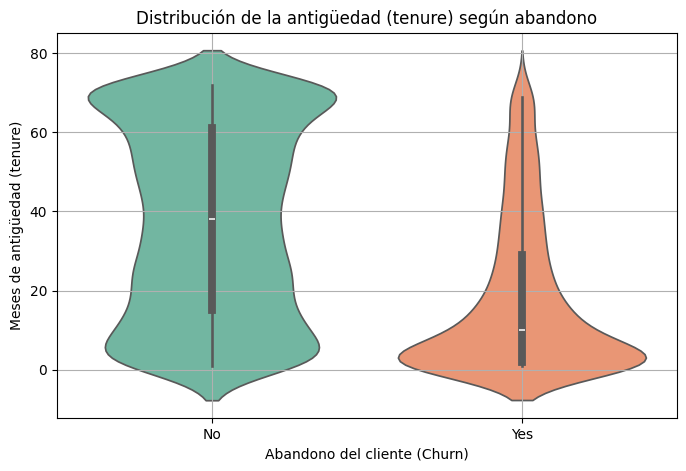

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df_final, x='Churn', y='tenure', hue='Churn', palette='Set2', legend=False)

plt.title('Distribución de la antigüedad (tenure) según abandono')
plt.xlabel('Abandono del cliente (Churn)')
plt.ylabel('Meses de antigüedad (tenure)')
plt.grid(True)
plt.show()



#### **Distribución de valor gastado por abandono**

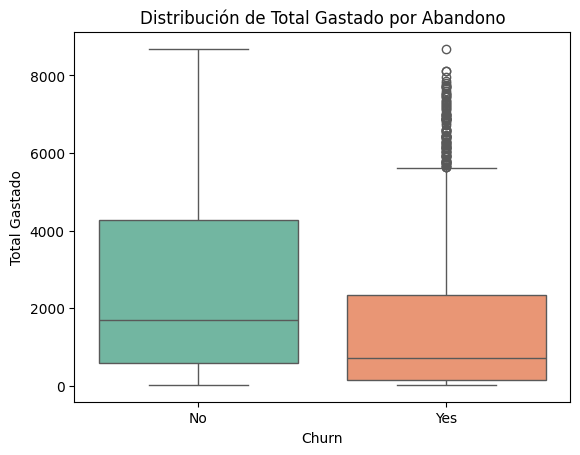

In [ ]:
# Boxplot para Charges.Total
sns.boxplot(data=df_final, x='Churn', y='Charges.Total', hue='Churn', palette='Set2', dodge=False)
plt.title('Distribución de Total Gastado por Abandono')
plt.xlabel('Churn')
plt.ylabel('Total Gastado')
plt.legend([],[], frameon=False)
plt.show()


In [ ]:
df_final.groupby('Churn')['Charges.Total'].describe()


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5163.0,2555.344141,2329.456984,18.80,577.825,1683.60,4264.125,8672.45
Yes,1869.0,1531.796094,1890.822994,18.85,134.500,703.55,2331.300,8684.80


Los clientes que abandonaron el servicio (Churn = Yes) tienen un gasto total promedio de aproximadamente **1,530**, con una mediana de solo **703**, mientras que los que se mantuvieron (Churn = No) tienen un gasto promedio cercano a **2,650**, y una mediana de **1,638**.

Esto indica que los clientes que invierten menos dinero en el servicio son más propensos a abandonarlo. La empresa debería enfocar estrategias de fidelización en este grupo de bajo gasto, ya que representa un segmento vulnerable a la cancelación.


#### **Distribución del cargo mensual por abandono**

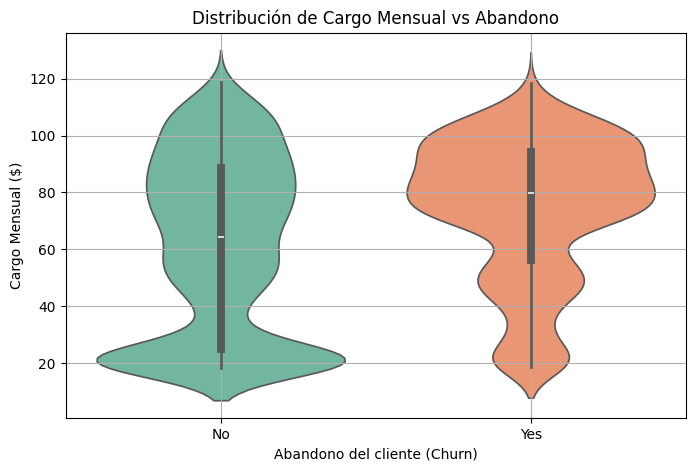

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df_final, x='Churn', y='Charges.Monthly', hue='Churn', palette='Set2', legend=False)

plt.title('Distribución de Cargo Mensual vs Abandono')
plt.xlabel('Abandono del cliente (Churn)')
plt.ylabel('Cargo Mensual ($)')
plt.grid(True)
plt.show()




Los clientes que pagan cargos mensuales más altos tienen una mayor tasa de abandono. En particular, los que pagan más de \$80 mensuales muestran una concentración significativa entre los que cancelaron el servicio. Por el contrario, los clientes con cargos bajos (entre \$20 y \$60) tienden a permanecer más tiempo.

**Recomendación:** Es clave revisar la percepción de valor en los planes de alto costo, ya que estos parecen estar más asociados con la evasión. Una estrategia de fidelización enfocada en estos segmentos podría reducir el abandono.


#### **Relacióm entre antiguedad y cargo mensual según abandono**

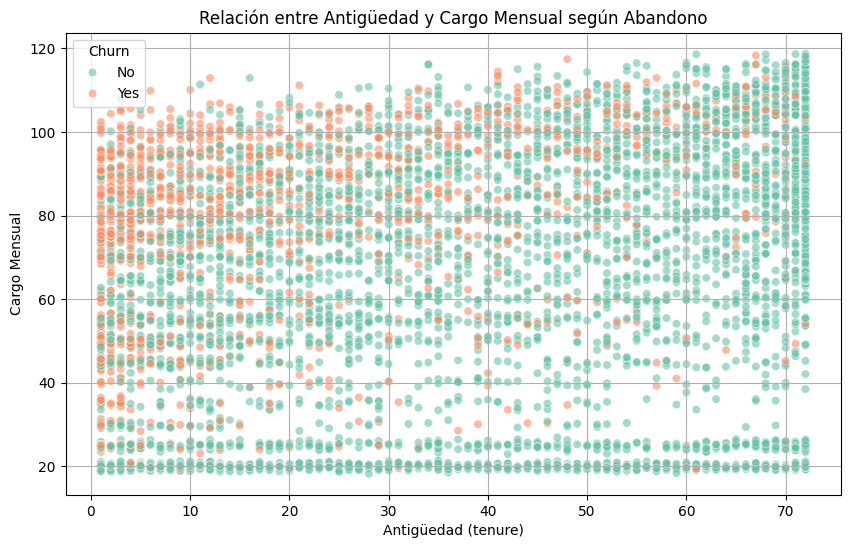

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_final, x='tenure', y='Charges.Monthly', hue='Churn', alpha=0.6, palette='Set2')
plt.title('Relación entre Antigüedad y Cargo Mensual según Abandono')
plt.xlabel('Antigüedad (tenure)')
plt.ylabel('Cargo Mensual')
plt.grid(True)
plt.show()


El gráfico de dispersión revela lo siguiente:

Clientes con baja antiguedad y altos cargos mensuales presentan una mayor tendencia al abandono.

Por el contrario, los clientes con mayor antiguedad tienden a no abandonar, especialmente si su cargo mensual es bajo o moderado.

Se observa una concentración de clientes fieles (Churn = No) en rangos de tenure altos y cargos mensuales bajos a medios.

✅ Recomendación:
Se sugiere diseñar estrategias de retención temprana para clientes nuevos que están pagando cargos altos, como promociones, planes personalizados o mejoras en el servicio durante los primeros meses.

##📄Informe final

### 🔹 Introducción


El presente análisis tiene como objetivo identificar los factores asociados a la **evasión de clientes (Churn)** en una empresa de telecomunicaciones. Comprender las características comunes entre los clientes que cancelan el servicio permite diseñar estrategias efectivas para **reducir la tasa de abandono**, aumentar la retención y optimizar la experiencia del cliente.


### 🔹 Limpieza y Tratamiento de Datos


📥 Primero, realicé la carga de datos directamente desde un archivo JSON alojado en GitHub. Para ello utilicé requests junto con pandas, "https://raw.githubusercontent.com/sthemonica/alura-voz/refs/heads/main/Dados/Telco-Customer-Churn.json".

🔍 Después de importar el dataset en formato JSON, identifiqué que varias columnas estaban estructuradas como diccionarios anidados. Para poder analizarlas de forma efectiva, aplané estos campos y los convertí en columnas individuales utilizando herramientas de pandas.

🔧 Posteriormente realicé una limpieza completa sobre el dataframe, que incluyó:

 - Conversión de la columna Charges.Total a tipo numérico (float), ya que originalmente estaba en formato object.

- Identificación de valores nulos reales en Charges.Total (11 registros), los cuales podrían deberse a errores de entrada o clientes nuevos sin cobros acumulados. Por ahora los mantengo para análisis posterior.

- Verificación de valores únicos y atípicos en columnas categóricas como Contract, InternetService, PaymentMethod, entre otras.

- Validación de consistencia en la columna Churn, asegurando que no existan valores vacíos o desconocidos.

- Se creó una nueva columna llamada Cuentas_Diarias, calculada a partir del valor mensual de facturación (Charges.Monthly). Esta columna representa una estimación del valor diario facturado por cada cliente y se obtiene dividiendo el valor mensual entre 30 días

Estas transformaciones dejaron el dataset listo para el análisis exploratorio


### 🔹 Análisis Exploratorio de Datos (EDA)

Se realizó un análisis descriptivo de las principales variables del dataset para comprender mejor el comportamiento de los clientes.

---

🔢 ***Variables Numéricas***

Se calcularon las siguientes métricas para columnas como `tenure`, `Charges.Monthly`, `Charges.Total` y `Cuentas_Diarias`:

- **Media**
- **Mediana**
- **Desviación estándar**
- **Valor mínimo y máximo**
- **Percentiles**

Este análisis permitió identificar:
- Clientes con altos montos facturados diariamente.
- Casos con poca antigüedad pero alta facturación.
- Alta dispersión en las tarifas mensuales y totales.

---

🧮 ***Variables Categóricas***

Se analizaron frecuencias de variables como:

- `gender`
- `InternetService`
- `Contract`
- `Churn`




#### 1. ⚖ Género (`gender`)
Al analizar la tasa de abandono por género, se observa que tanto hombres como mujeres presentan un porcentaje de abandono muy similar (27% para mujeres y 26% para hombres). Esto indica que el género no influye de forma significativa en la decisión de los clientes de abandonar el servicio.

![Gráfico de abandono por género](https://github.com/JonathanPuertaG/Challenge2-TelecomX/blob/main/abandono_genero.png?raw=1)



#### 2. 📃 Tipo de Contrato (`Contract`)

Los clientes con contratos mensuales presentan una mayor tasa de abandono, mientras que aquellos con contratos de 1 o 2 años muestran menor propensión a cancelar el servicio.  
Esto sugiere que los contratos de mayor duración fomentan mayor fidelidad, posiblemente debido a incentivos o cláusulas de permanencia.

✅ **Recomendación:** Promover la migración de clientes a contratos anuales mediante beneficios o descuentos exclusivos.

![Gráfico de abandono por tipo de contrato](https://github.com/JonathanPuertaG/Challenge2-TelecomX/blob/main/abandono_contrato.png?raw=1)




#### 3. 🌐 Tipo de servicio de Internet (`InternetService`)

El porcentaje de abandono es más alto en los clientes con servicio de fibra óptica (41.9%), seguido por quienes tienen DSL (19%). En contraste, los clientes que no tienen servicio de internet presentan la tasa de abandono más baja (7.4%).
Esto sugiere que los clientes con servicios más complejos o costosos (como fibra óptica) tienen mayor probabilidad de abandonar, posiblemente por problemas de satisfacción o percepción de valor frente al costo.

🔎 **Recomendación:** Revisar la experiencia de los usuarios de fibra óptica y aplicar estrategias de retención específicas.

![Gráfico de abandono por tipo de contrato](https://github.com/JonathanPuertaG/Challenge2-TelecomX/blob/main/abandono_tipo_servicio.png?raw=1)


#### 4. 👴 Adultos Mayores (`SeniorCitizen`)

Los clientes mayores (etiquetados como SeniorCitizen = 1) tienen una tasa de abandono significativamente más alta (41.7%) en comparación con los no mayores (23.7%). Esta diferencia sugiere que los adultos mayores podrían estar menos satisfechos con el servicio o encontrarlo menos adaptado a sus necesidades.

🔍 Recomendación: Diseñar ofertas más simples o con atención personalizada para este grupo podría reducir su tasa de cancelación.

![Gráfico de abandono por adulto mayor](https://github.com/JonathanPuertaG/Challenge2-TelecomX/blob/main/abandono_adulto_mayor.png?raw=1)



#### 5. 💳 Método de Pago (`PaymentMethod`)

El método de pago tiene una influencia importante en el abandono. Los clientes que usan cheque electrónico (Electronic check) presentan una tasa de abandono significativamente más alta (45.3%) en comparación con los que utilizan métodos automáticos como transferencia bancaria (16.7%) o tarjeta de crédito (15.3%).

💡 Recomendación: Incentivar el uso de métodos automáticos de pago podría ayudar a reducir el abandono.

![Gráfico de barras: PaymentMethod](https://github.com/JonathanPuertaG/Challenge2-TelecomX/blob/main/abandono_metodo_pago.png?raw=1)


#### 6. 📉 Antigüedad del Cliente (`tenure`)

Los clientes con menor antiguedad (0-6 meses) presentan la tasa más alta de abandono (53%). A medida que aumenta el tiempo de permanencia, el porcentaje de abandono disminuye de forma constante, estabilizándose por debajo del 25% después de los 2 años. Esto sugiere que los esfuerzos de retención deben enfocarse especialmente en los primeros meses del ciclo de vida del cliente.

![Boxplot: Charges.Total](https://github.com/JonathanPuertaG/Challenge2-TelecomX/blob/main/abandono_antiguedad.png?raw=1)



#### 7. 💰 Cargo Total (`Charges.Total`)
- Clientes que **gastaron poco** en total tienen mayor probabilidad de abandonar.

![Boxplot: Charges.Total](insertar_aquí_imagen_totalcharges.png)






## 🔹 Conclusiones e Insights

- Clientes con **baja antigüedad**, **contrato mensual**, **fibra óptica**, **adultos mayores**, y pagos con **cheque electrónico** son más propensos a cancelar.
- La **antigüedad y el tipo de contrato** son variables clave para la fideliz


In [76]:
from google.colab import files
files.download('abandono_antiguedad.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>